In [173]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [174]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [175]:

df_india=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='India')].copy()
df_india

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc","['sql', 'python', 'databricks', 'power bi', 'e...","{'analyst_tools': ['power bi', 'excel', 'word'..."
123,Data Analyst,Data Analytics work from home job/internship a...,Anywhere,via LinkedIn,Part-time,True,India,2023-03-07 13:37:56,False,False,India,None,NaN,NaN,Inoket Solutions Private Limited,"['sql', 'excel', 'word', 'powerpoint', 'outloo...","{'analyst_tools': ['excel', 'word', 'powerpoin..."
159,Data Analyst,Data Analyst,"Hyderabad, Telangana, India",via LinkedIn,Contractor,False,India,2023-11-28 13:12:07,False,False,India,None,NaN,NaN,Fusion Plus Solutions Inc,['sql'],{'programming': ['sql']}
171,Data Analyst,Data Base work from home job/internship at Mga...,Anywhere,via LinkedIn,Full-time,True,India,2023-01-14 13:11:58,False,False,India,None,NaN,NaN,Mgadz Inc,"['sas', 'sas', 'sql']","{'analyst_tools': ['sas'], 'programming': ['sa..."
194,Data Analyst,Data Analyst,India,via BeBee India,Full-time,False,India,2023-06-20 13:11:10,False,False,India,None,NaN,NaN,QuEST Global Services Pte. Ltd,"['python', 'sql', 'excel', 'ms access', 'power...","{'analyst_tools': ['excel', 'ms access', 'powe..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785517,Data Analyst,Analyst - Data Analytics/SQL (2-9 yrs),"Gurugram, Haryana, India",via BeBee India,Full-time,False,India,2023-10-16 06:10:56,False,False,India,None,NaN,NaN,iimjobs,['power bi'],{'analyst_tools': ['power bi']}
785548,Data Analyst,Data Analyst,"Bengaluru, Karnataka, India",via LinkedIn,Full-time,False,India,2023-01-19 06:14:17,False,False,India,None,NaN,NaN,Artech L.L.C.,"['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
785628,Data Analyst,Data Analyst,"Gurugram, Haryana, India",via LinkedIn,Full-time,False,India,2023-01-09 06:08:12,False,False,India,None,NaN,NaN,GUS Global Services India Pvt. Ltd.,"['r', 'python', 'sql', 'sap', 'power bi', 'tab...","{'analyst_tools': ['sap', 'power bi', 'tableau..."
785691,Data Analyst,Business Intelligence Engineer,"Chennai, Tamil Nadu, India",via LinkedIn,Full-time,False,India,2023-01-23 06:12:09,False,False,India,None,NaN,NaN,Mobile Programming LLC,"['sql', 'python', 'shell', 'sql server', 'tabl...","{'analyst_tools': ['tableau', 'microstrategy']..."


In [176]:
def clean_list(skills):
    if pd.notna(skills):
        return ast.literal_eval(skills)
df_india['job_skills']=df_india['job_skills'].apply(clean_list)

In [177]:
df_explode=df_india.explode('job_skills')

In [178]:
df_explode['job_month']=df_explode['job_posted_date'].dt.month

In [179]:
df_explode

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_month
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc",sql,"{'analyst_tools': ['power bi', 'excel', 'word'...",7
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc",python,"{'analyst_tools': ['power bi', 'excel', 'word'...",7
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc",databricks,"{'analyst_tools': ['power bi', 'excel', 'word'...",7
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc",power bi,"{'analyst_tools': ['power bi', 'excel', 'word'...",7
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc",excel,"{'analyst_tools': ['power bi', 'excel', 'word'...",7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785691,Data Analyst,Business Intelligence Engineer,"Chennai, Tamil Nadu, India",via LinkedIn,Full-time,False,India,2023-01-23 06:12:09,False,False,India,None,NaN,NaN,Mobile Programming LLC,shell,"{'analyst_tools': ['tableau', 'microstrategy']...",1
785691,Data Analyst,Business Intelligence Engineer,"Chennai, Tamil Nadu, India",via LinkedIn,Full-time,False,India,2023-01-23 06:12:09,False,False,India,None,NaN,NaN,Mobile Programming LLC,sql server,"{'analyst_tools': ['tableau', 'microstrategy']...",1
785691,Data Analyst,Business Intelligence Engineer,"Chennai, Tamil Nadu, India",via LinkedIn,Full-time,False,India,2023-01-23 06:12:09,False,False,India,None,NaN,NaN,Mobile Programming LLC,tableau,"{'analyst_tools': ['tableau', 'microstrategy']...",1
785691,Data Analyst,Business Intelligence Engineer,"Chennai, Tamil Nadu, India",via LinkedIn,Full-time,False,India,2023-01-23 06:12:09,False,False,India,None,NaN,NaN,Mobile Programming LLC,microstrategy,"{'analyst_tools': ['tableau', 'microstrategy']...",1


In [180]:
import calendar

# create month abbreviation if not already
df_explode['job_month_str'] = df_explode['job_month'].apply(lambda x: calendar.month_abbr[int(x)])

# sort whole DataFrame by numeric month (guarantees calendar order)
df_explode = df_explode.sort_values(by='job_month', ascending=True)

# optional: reset index if you want tidy ordering
df_explode = df_explode.reset_index(drop=True)

# now you can drop the numeric month if you really want to
df_explode = df_explode.drop(columns='job_month')


In [181]:
print(df_explode.columns)

Index(['job_title_short', 'job_title', 'job_location', 'job_via',
       'job_schedule_type', 'job_work_from_home', 'search_location',
       'job_posted_date', 'job_no_degree_mention', 'job_health_insurance',
       'job_country', 'salary_rate', 'salary_year_avg', 'salary_hour_avg',
       'company_name', 'job_skills', 'job_type_skills', 'job_month_str'],
      dtype='object')


In [182]:
df_explode_india = df_explode.pivot_table(
    index='job_month_str',
    columns='job_skills',
    aggfunc='size',
    fill_value=0
)

In [183]:
df_explode_india

job_skills,airflow,alteryx,angular,ansible,arch,asana,asp.net,assembly,atlassian,aurora,...,vue.js,watson,webex,windows,wire,word,workfront,wrike,yarn,zoom
job_month_str,,,,,,,,,,,,,,,,,,,,,
Apr,8,8,1,0,4,0,1,2,0,0,...,0,0,1,4,0,27,0,0,0,1
Aug,19,25,2,0,0,0,0,0,2,0,...,0,1,0,4,0,31,0,0,1,1
Dec,7,19,0,0,0,0,1,1,0,0,...,0,0,0,5,1,12,0,0,0,3
Feb,7,17,1,0,2,0,0,1,0,1,...,0,1,1,5,0,24,0,0,0,0
Jan,3,21,1,0,0,0,1,0,0,0,...,0,0,1,4,1,37,0,0,0,3
Jul,10,13,2,0,1,0,0,0,0,1,...,0,4,0,4,0,22,0,0,0,2
Jun,5,22,1,0,0,0,1,0,0,1,...,0,0,0,1,0,12,1,0,0,1
Mar,6,16,2,1,0,0,0,1,1,0,...,0,0,0,5,0,27,0,0,0,2
May,5,13,0,0,1,0,0,0,0,0,...,0,0,0,5,0,13,0,0,0,0


In [184]:
df_explode_india.loc['Total'] = df_explode_india.sum()
df_explode_india = df_explode_india[df_explode_india.loc['Total'].sort_values(ascending=False).index]
df_explode_india = df_explode_india.drop('Total')

In [185]:
df_explode_india

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,hugging face,fastapi,kotlin,powerbi,mariadb,sqlite,clickup,suse,twilio,centos
job_month_str,,,,,,,,,,,,,,,,,,,,,
Apr,204,143,138,98,83,56,52,40,31,28,...,0,0,0,0,0,0,0,0,0,0
Aug,317,216,192,152,127,112,98,52,63,40,...,0,0,0,0,0,0,0,0,0,0
Dec,333,239,217,178,162,114,100,55,30,28,...,0,0,0,0,0,0,0,0,0,0
Feb,209,148,156,116,75,67,82,26,33,25,...,0,0,0,0,0,0,0,0,0,0
Jan,305,216,218,159,98,89,128,46,32,43,...,0,1,0,0,0,0,0,0,1,0
Jul,245,161,174,124,93,67,78,39,31,31,...,1,0,1,0,0,0,0,0,0,0
Jun,193,150,115,114,77,76,74,37,32,24,...,0,0,0,0,0,0,0,0,0,0
Mar,229,151,138,125,76,58,62,45,38,29,...,0,0,0,1,0,0,0,1,0,0
May,155,101,106,71,61,42,30,33,22,19,...,0,0,0,0,0,0,0,0,0,1


<Axes: xlabel='job_month_str'>

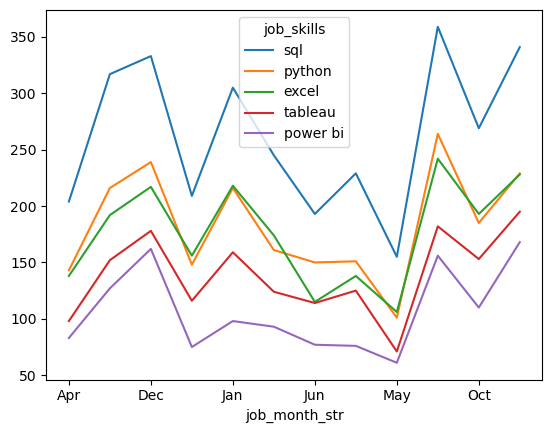

In [186]:
df_explode_india.iloc[:,:5].plot(kind='line')